In [29]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Exploratory Data Analysis

## Correlation Analysis

In [32]:
# Overview of the dataset
X.info()

# Display the first few rows
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [33]:
X.describe(include=['object', 'category'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,44923,45211,43354,45211,45211,45211,32191,45211,8252
unique,11,3,3,2,2,2,2,12,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901


In [34]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


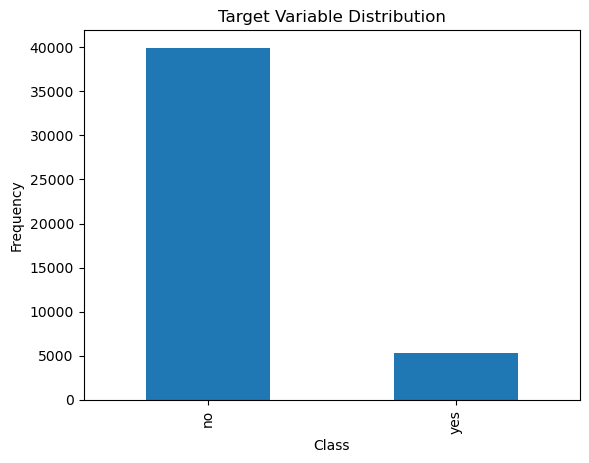

In [35]:
y['y'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Calculate percentage distribution
class_distribution = y['y'].value_counts(normalize=True) * 100
print(class_distribution)

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


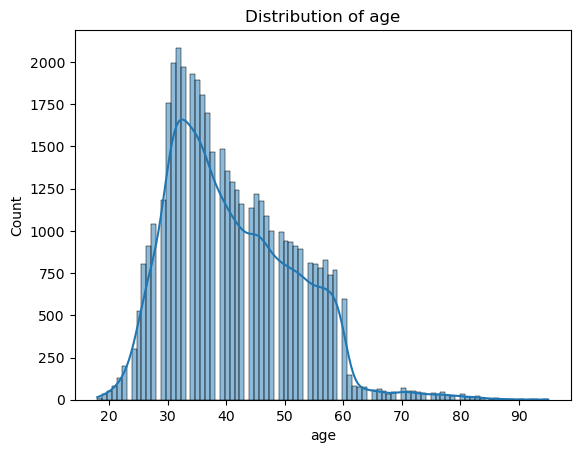

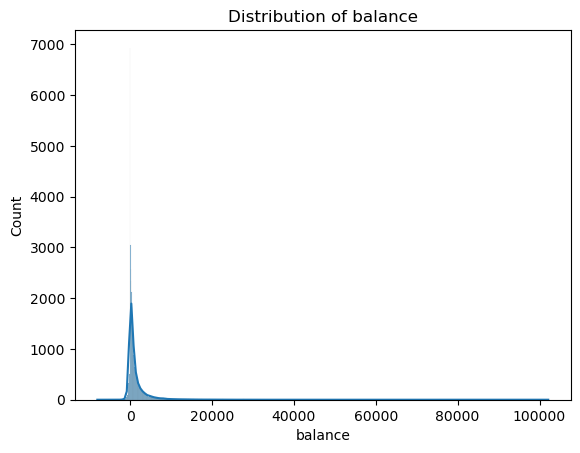

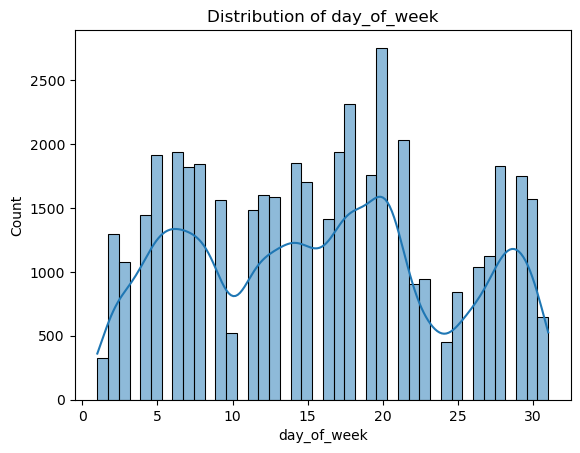

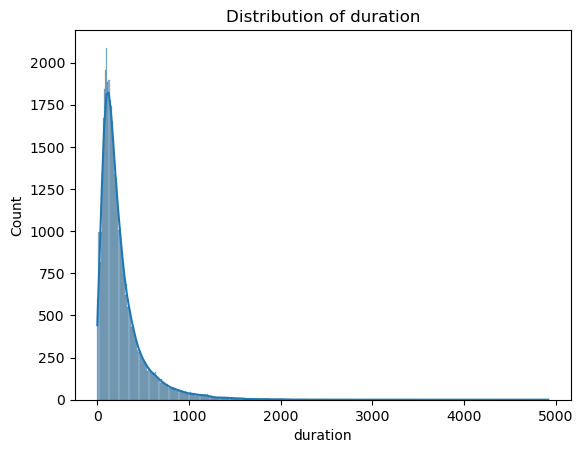

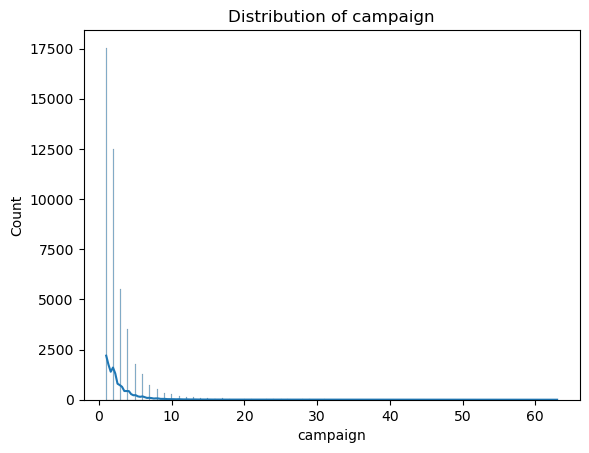

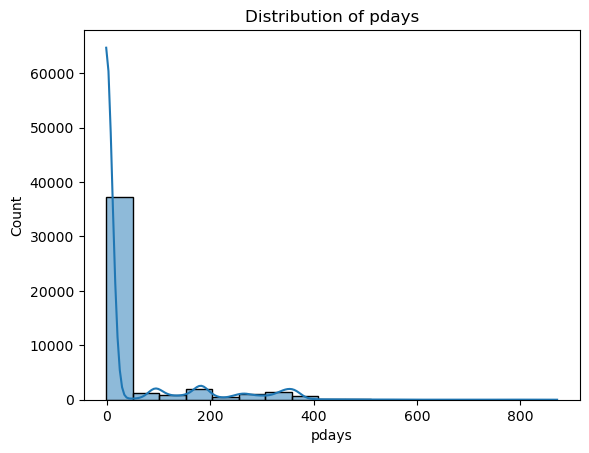

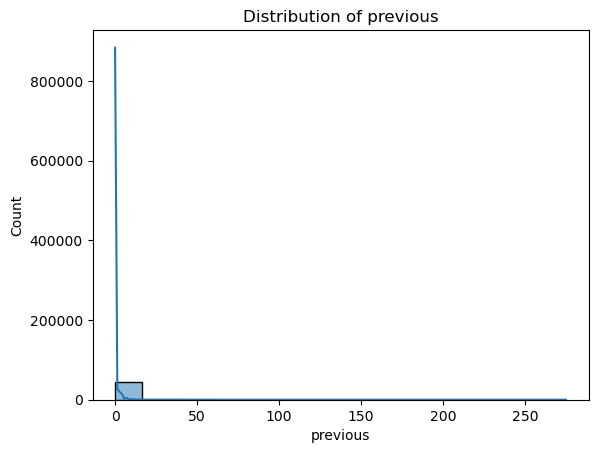

In [37]:
# Distribution plots for numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Data Cleaning


## Handle Missing Values

In [38]:
# X['job'].fillna(X['job'].mode, inplace = True)
# X['education'].fillna(X['education'].mode, inplace = True)
# X.isna().sum()

# Initialize LabelEncoder
le= LabelEncoder()

# Create a copy of the original 'education' column
X['education_original'] = X['education']
X['job_original'] = X['job']
X['marital_original'] = X['marital']
X['day_of_week_original'] = X['day_of_week']
X['month_original'] = X['month']
X['default_original'] = X['default']
X['housing_original'] = X['housing']
X['loan_original'] = X['loan']

# Converting non-numeric features to numeric
X['marital'] = le.fit_transform(X['marital'].astype(str))
X['day_of_week'] = le.fit_transform(X['day_of_week'].astype(str))
X['month'] = le.fit_transform(X['month'].astype(str))
X['default'] = le.fit_transform(X['default'].astype(str))
X['housing'] = le.fit_transform(X['housing'].astype(str))
X['loan'] = le.fit_transform(X['loan'].astype(str))

# Apply Label Encoding to the 'job' column (NaN values will remain NaN)
X['education'] = le.fit_transform(X['education'].astype(str))
X['job'] = le.fit_transform(X['job'].astype(str))

# Display the encoded values
print(X[['education', 'education_original']].head())
print(X[['job', 'job_original']].head())

   education education_original
0          3           tertiary
1          2          secondary
2          2          secondary
3          0                NaN
4          0                NaN
   job  job_original
0    4    management
1   10    technician
2    2  entrepreneur
3    1   blue-collar
4    5           NaN


## One-hot encoding for categorical variables

Categorical: job, education, marital, contact, poutcome


In [39]:
# One-hot encoding for categorical variables
one_hot_data = pd.get_dummies(X, drop_first=True, columns=['job', 'education', 'marital', 'contact', 'poutcome'])
one_hot_data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'education_original',
       'job_original', 'marital_original', 'day_of_week_original',
       'month_original', 'default_original', 'housing_original',
       'loan_original', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6',
       'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'education_1',
       'education_2', 'education_3', 'marital_1', 'marital_2',
       'contact_telephone', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [40]:
# Change NaN labels into a unique identifier
X['education'] = X['education'].replace(0,99)
X['job'] = X['job'].replace(5,99)

# Display the encoded values
print(X[['education', 'education_original']].head())
print(X[['job', 'job_original']].head())

   education education_original
0          3           tertiary
1          2          secondary
2          2          secondary
3         99                NaN
4         99                NaN
   job  job_original
0    4    management
1   10    technician
2    2  entrepreneur
3    1   blue-collar
4   99           NaN


In [41]:
# Select features that could be relevant to job for imputation
features_for_imputation = ['age', 'default', 'balance', 'housing', 'loan',
                           'day_of_week','month', 'duration', 'campaign', 'pdays',
                           'previous', 'marital', 'education', 'job']

# Dataframe with selected features
data_subset = X[features_for_imputation]
print(data_subset.head())

# Scale the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data_subset), columns=data_subset.columns)

# Initialize KNNImputer (use n_neighbors=5 by default or any other number of neighbors)
imputer = KNNImputer(n_neighbors=5, missing_values=99)

# Perform KNN Imputation (fit and transform the data)
imputed_data = imputer.fit_transform(data_subset)

# Convert imputed data back into a DataFrame
data_imputed = pd.DataFrame(imputed_data, columns=features_for_imputation)

# Round the imputed job values to the nearest integer (as job is categorical)
data_imputed['education'] = np.round(data_imputed['education']).astype(int)
data_imputed['job'] = np.round(data_imputed['job']).astype(int)

# Display the imputed values
print(data_imputed.head())


   age  default  balance  housing  loan  day_of_week  month  duration  \
0   58        0     2143        1     0           26      8       261   
1   44        0       29        1     0           26      8       151   
2   33        0        2        1     1           26      8        76   
3   47        0     1506        1     0           26      8        92   
4   33        0        1        0     0           26      8       198   

   campaign  pdays  previous  marital  education  job  
0         1     -1         0        1          3    4  
1         1     -1         0        2          2   10  
2         1     -1         0        1          2    2  
3         1     -1         0        1         99    1  
4         1     -1         0        2         99   99  
    age  default  balance  housing  loan  day_of_week  month  duration  \
0  58.0      0.0   2143.0      1.0   0.0         26.0    8.0     261.0   
1  44.0      0.0     29.0      1.0   0.0         26.0    8.0     151.0   
2  

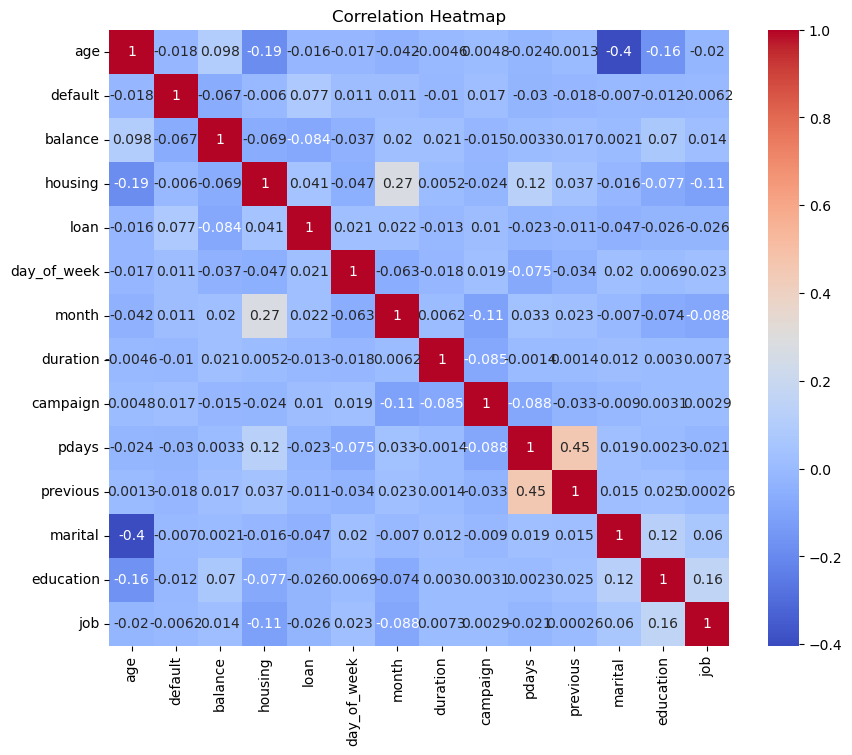

In [42]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()